In [2]:
import backtrader as bt
from backtester import backtest15,backtestday
import numpy as np

import pandas as pd

import logging
logging.basicConfig(filename="log.txt", level=logging.DEBUG)

In [20]:
corrs = []

class trial(bt.Strategy):
    params = (('fast',50),('slow',200),('order_percentage',0.95),('ticker','SPY'))

    
    def log(self, txt, date=None):
        date = date or self.data.datetime.date(0)
        time = date or self.data.datetime.time()
        logging.debug('%s-%s, %s' % (date.isoformat(), time, txt))
        
        
    def notify_order(self, order):
        
        if order.status in [order.Submitted, order.Accepted]:
            return

        if order.status in [order.Completed]:
            if order.isbuy():
                self.log("Buy EXECUTED {}".format(order.executed.price))
            elif order.issell():
                self.log("Sell EXECUTED {}".format(order.executed.price))

                
    def __init__(self):
        self.x=0

    def next(self):
#         self.log('hello')
        a =[]
        for j in range(7):
            a.append([])
            for i in range(10):
                a[j].append(self.data.close[-i-j])

        for i in range(7):
            a[i] = np.array(a[i])

        a = np.array(a)
        for i in range(6):
            a[i+1] = (a[i+1]-a[0])/a[0]
        x = a[0]
        a=a[1:]
        a = pd.DataFrame(a)
#         print(a)
        b = a.mean(axis=0)
#         print(b[9])
        cor = np.corrcoef(x,b)[0][1]
        corrs.append(cor)
        if(abs(cor)>0.8 and b[9] < -0.02):
#             print("aa")
            if not self.position:
                a = self.broker.getvalue()/2
                brackets = self.buy_bracket(size=np.round(a/self.data.close[0]),limitprice=self.data.close[0]*1.05, stopprice=self.data.close[0]*0.95)
#                 print(brackets)
        

Starting Portfolio Value: 100000.00
Sharpe Ratio: OrderedDict([('sharperatio', 2.7103510301722027)])
Final Portfolio Value: 146108.25


<IPython.core.display.Javascript object>


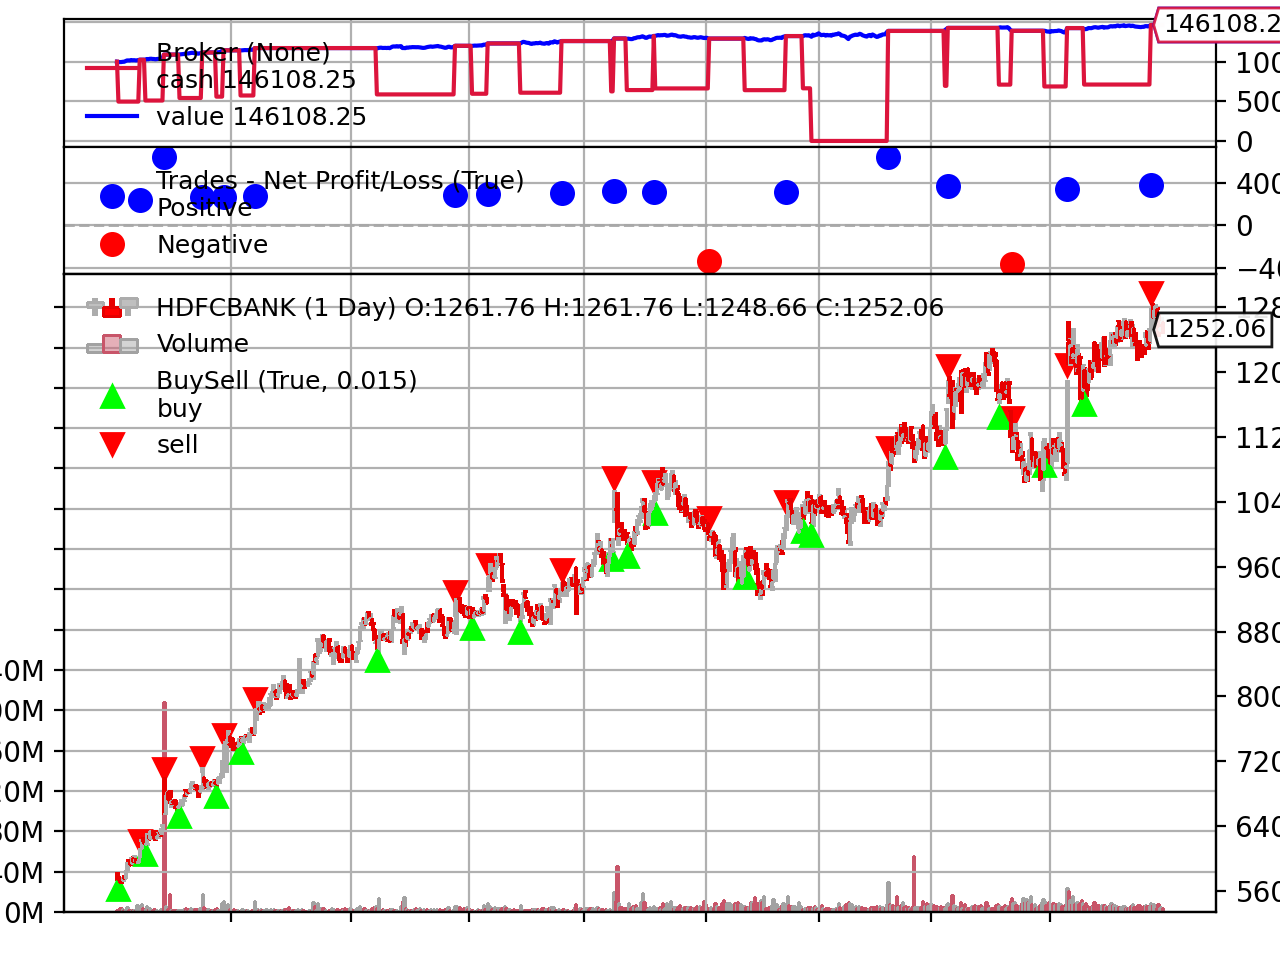

In [21]:
backtestday('HDFCBANK',trial)